In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd
import pandas#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

Cell 1:

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

Cell 2:

# ***What?*** 
<200 words

Cell 3:

I plan to analyze the discourse of Russian language newspapers from 1984 to about the year 2000 in order to track the influence that the massive political changes in Russia during those years had on the content of the newspapers. I plan to examine issues of Russian language newspapers, in order to examine how discourses of Communism, Capitalism, and Democracy interacted and vied for dominance in Russian/Soviet media. 


## ***Why?***
<200 words

Cell 4:

There has been some work done on language instability in Russia during the 1990's, most notably by Michael Gorham, but little analysis of the discourse of the media. Experts, such as Stephen Kotkin, theorize that Gorbachev's reforms in the 1980's disconnected the Soviet State from its ideological apparatus, allowing, for the first time, the free flow of information in Russia, the free importation of western ideas about democracy and the market, and the free criticism of Communism, Marxism, and the Soviet Union. It has been theorized that this contributed to the collapse of the Soviet Union in 1991. If I can demonstrate that Market and Democratic language infiltrated Soviet newspapers a significant amount of time prior to 1991, then this would be a strong indicator that this discourse could have influenced the collapse. 


## ***How?***
<400 words

Cell 5:

I want to appraoch this project from three angles. First from a simple word frequency analysis. I am thinking of this as more or less preparatory work, that will give me a broad sense of what each document and year is about, and how they fit together into the broader decade that I am examining. This should already give me meaningful results, by clumping together years, for example, I will be able to gain a birds eye view of the evolution of the discourse of the newspaper. Similarly, this will allow me to track precisely when certain words entered the discourse, thereby allowing me to track the entrance and exit of significant discourses. Then I want to classify the documents that I have, in order to track the dissapearance of a Soviet discourse. I know that the early 1980's were totally soviet, and the late 1990's were totally not, but the exact point in time at which the Soviet discourse dissappeared is a bit ambigious. Using the two extremes as training sets, I hope to be able to classify the rest of the database into communist and not communist discourses, and see where one ends the other begins. Finally, Dynamic Topic Moddeling has provided me with very good results, and I would be very interested to see where I can take that. Again, time interests me, so I would like to see where certain topics dominate, temporally, and draw conclusions about the historic moment from that.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

Cell 6:

I propose to conduct a systematic sampling of a relevant and prominent Soviet newspaper in order to extract a representative sample of issues and articles that I will then analyze in order to identify the prominent discourses within them. I propose to divide each year into 13 segments of equal length, in order to offset both monthly and weekly bias that might otherwise inject itself into my sample. Dividing a year into 13 equal chunks also means that the least number of days is potentially left out of the sample. In a standard 365 day year, 13 chunks of 28 days means that 364 days have the potential of being selected for my sample. In this way, I am able to get a representative and unbiased sample of a year's worth of coverage from a newspaper.

The limitation is of course the size of the sample, which is not reflective of the overall size of the corpus that I am interested in. This also provides opportunities for scaling up by conducting an analysis of the entirety of the run of the newspaper in the years under examination.

## ***Which (words)?***
<300 words

There are some words that are more prominent than others. Words relating to Communism, such as Communism, Socialism, Central Committee, International, among others, are important for establishing and maintaining a soviet discourse. On the other extreme are words relating to banking, enterprise, and the free market. Once again, tracking these words, and seeing where the balance tips in favor of the free market would be a very interesting an meaningful observation.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

In [7]:
df = pd.read_json("izvestiia_complete2.json")

In [8]:
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 

In [9]:
df

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas,lemmas_string
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,\t\t марта года\n\nФУТБОЛ ИГРА БОРЬБА ПРАЗДН...,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,а\n\n\tа\t\n\n\t\t\t\t Подробности длл\n\nСто ...,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии \t \n\nСовместное советско малайзийск...,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ\t по странам и континентам\t\t \n\...,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\n\tГ О СТРАНАМ ИР НСНТИНЕНТАМ ...,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...
...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...


In [10]:
df = df.drop("clean_text", axis = 1)
df

,text,year,filename,type,category,clean_text2,tokenized,lemmas,lemmas_string
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...
...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...


In [11]:
export_json = df.to_json('izvestiia_lemmas_complete.json')

In [12]:
export_json = df.to_csv('izvestiia_lemmas_complete.csv')

In [13]:
izvestiiadf = df

In [14]:
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()

In [15]:
izvestiiaVects = ngCountVectorizer.fit_transform(izvestiiadf['lemmas_string'])
print(izvestiiaVects.shape)

(1304, 494174)


In [16]:
izvestiiaVects

<1304x494174 sparse matrix of type '<class 'numpy.int64'>'
	with 1860263 stored elements in Compressed Sparse Row format>

In [22]:
izvestiiaTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(izvestiiaVects)
izvestiiaTF = izvestiiaTFTransformer.transform(izvestiiaVects)
print(izvestiiaTF.shape)

(1304, 494174)


In [23]:
list(zip(ngCountVectorizer.vocabulary_.keys(), izvestiiaTF.data))[:20]

[('март', 0.017743976535700434),
 ('годафутбол', 0.020474536501493838),
 ('игра', 0.02333241900800726),
 ('борьба', 0.006603401304180763),
 ('праздниктурецкий', 0.02333241900800726),
 ('футболист', 0.013420167218739162),
 ('уметь', 0.02333241900800726),
 ('шутить', 0.02333241900800726),
 ('даже', 0.02333241900800726),
 ('совсем', 0.013583149429142754),
 ('радостный', 0.02333241900800726),
 ('минута', 0.022067785852661708),
 ('проиграть', 0.02333241900800726),
 ('матч', 0.02333241900800726),
 ('туфля', 0.008984669324266654),
 ('два', 0.02333241900800726),
 ('нога', 0.02333241900800726),
 ('забраться', 0.01990588119418107),
 ('озорно', 0.02333241900800726),
 ('заметить', 0.006862195900573031)]

In [24]:
#limit our word vector to 1000 words with at least 3 occurrences, which do not occur in more than half of the documents.
izTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, norm='l2')

izvestiiaTFVects = izTFVectorizer.fit_transform(izvestiiadf['lemmas_string'])

In [25]:
izvestiiaTFVects

<1304x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 377774 stored elements in Compressed Sparse Row format>

In [26]:
print(izvestiiaTFVects.shape)

(1304, 1000)


# Flat Clustering with $K$-means

In [66]:
km = sklearn.cluster.KMeans(n_clusters=7, init='k-means++')

In [67]:
km.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
# 3 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [40]:
# 2 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [43]:
# 4 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [68]:
# 7 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [49]:
#3
terms = izTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 фильм
 иа
 ие
 же
 суд
 ребенок
 русский
 деньги
 команда
 закон


Cluster 1:
 банк
 компания
 доллар
 тело
 ул
 факс
 финансовый
 миллиард
 валютный
 акция


Cluster 2:
 цк
 кпсс
 иа
 ядерный
 депутат
 верховный
 секретарь
 съезд
 вооружение
 военный




In [82]:
#7
terms = izTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(7):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 ядерный
 цк
 вооружение
 оружие
 кпсс
 иа
 сотрудничество
 военный
 делегация
 американский
 переговоры
 секретарь
 тасса
 визит
 социалистический
 безопасность
 война
 оон
 иностранный
 корр


Cluster 1:
 депутат
 кпсс
 цк
 хозяйство
 иа
 верховный
 съезд
 труд
 коллектив
 наука
 трудовой
 продукция
 совхоз
 задача
 социальный
 колхоз
 научный
 пятилетка
 товарищ
 союзный


Cluster 2:
 иа
 ие
 же
 ти
 ив
 ми
 де
 ре
 ии
 иг
 про
 военный
 ть
 нести
 депутат
 ма
 гражданин
 ин
 оса
 верховный


Cluster 3:
 деньги
 суд
 доллар
 компания
 закон
 тело
 факс
 военный
 выборы
 ельцин
 русский
 рф
 бывший
 банк
 машина
 сообщить
 ребенок
 война
 александр
 журналист


Cluster 4:
 банк
 компания
 доллар
 валютный
 миллиард
 финансовый
 акция
 биржа
 бумага
 рост
 кредит
 объем
 инвестиция
 курс
 бюджет
 банковский
 триллион
 валюта
 ставка
 кредитный


Cluster 5:
 фильм
 матч
 серия
 команда
 чемпионат
 спорт
 новость
 сборная
 игра
 ночь
 концерт
 иа
 театр

In [70]:
izvestiiadf['kmeans_predictions_7'] = km.labels_
izvestiiadf

,text,year,filename,type,category,clean_text2,tokenized,lemmas,lemmas_string,kmeans_predictions,kmeans_predictions_6,kmeans_predictions_7
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...,3,4,5
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...,3,4,5
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...,4,5,0
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...,0,1,3
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...,2,2,4
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...,0,1,3
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...,0,1,3
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...,1,3,6


In [71]:
export_json = izvestiiadf.to_json('izvestiia_kmeans.json')

In [72]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(izvestiiaTFVects.toarray())
reduced_data = pca.transform(izvestiiaTFVects.toarray())

In [73]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [76]:
colordict = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue',
    5: 'purple',
    6: 'black'
            }

colors = [colordict[c] for c in izvestiiadf['kmeans_predictions_7']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([(0, 'red'), (1, 'orange'), (2, 'yellow'), (3, 'green'), (4, 'blue'), (5, 'purple'), (6, 'black')])


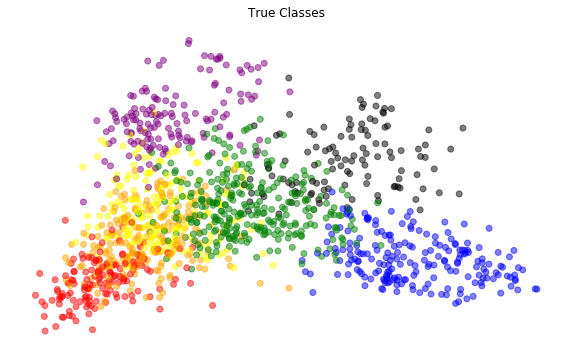

In [77]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [78]:
km6 = sklearn.cluster.KMeans(n_clusters=6, init='k-means++')

In [79]:
km6.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
# 6 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km6.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km6.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km6.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km6.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [81]:
#6
terms = izTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km6.cluster_centers_.argsort()[:, ::-1]
for i in range(6):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 ядерный
 цк
 вооружение
 кпсс
 оружие
 иа
 сотрудничество
 военный
 делегация
 переговоры


Cluster 1:
 иа
 ие
 военный
 суд
 деньги
 выборы
 бывший
 закон
 доллар
 же


Cluster 2:
 ул
 тело
 факс
 телефон
 компьютер
 склад
 оборудование
 банк
 ао
 товар


Cluster 3:
 банк
 компания
 доллар
 миллиард
 финансовый
 валютный
 акция
 биржа
 бумага
 бюджет


Cluster 4:
 фильм
 матч
 команда
 серия
 чемпионат
 сборная
 спорт
 игра
 новость
 иа


Cluster 5:
 депутат
 кпсс
 цк
 иа
 хозяйство
 верховный
 съезд
 труд
 ие
 коллектив




In [64]:
izvestiiadf['kmeans_predictions_6'] = km6.labels_

,text,year,filename,type,category,clean_text2,tokenized,lemmas,lemmas_string,kmeans_predictions,kmeans_predictions_6
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...,3,4
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...,3,4
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...,4,5
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...,0,1
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...,4,5
...,...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...,2,2
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...,0,1
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...,0,1
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...,1,3


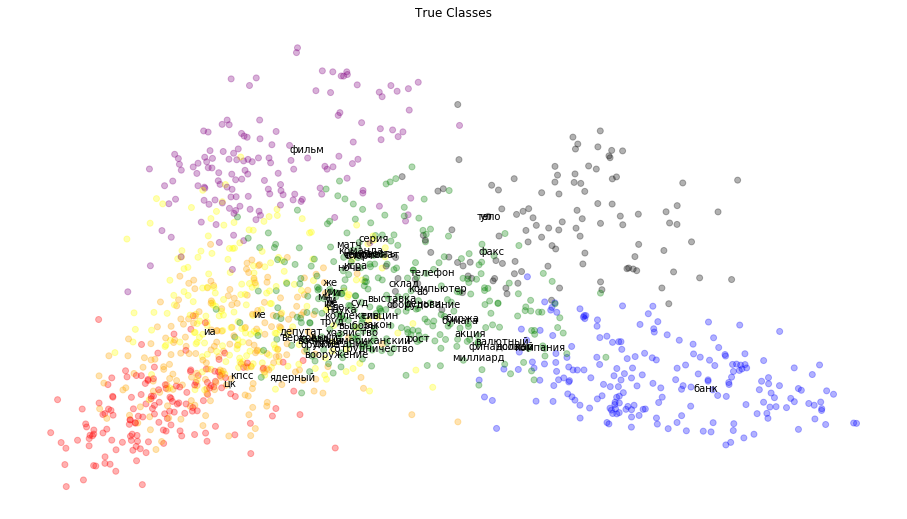

In [83]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [84]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


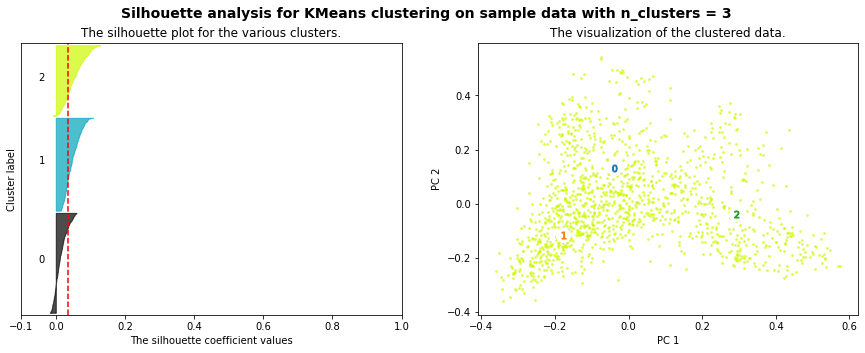

For n_clusters = 3, The average silhouette_score is : 0.036


In [85]:
X = izvestiiaTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


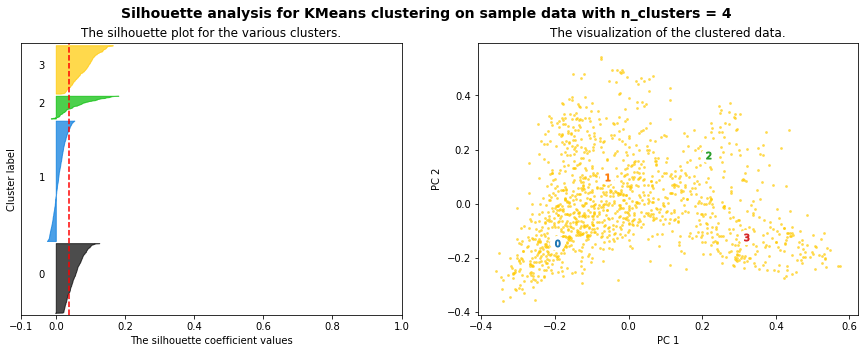

For n_clusters = 4, The average silhouette_score is : 0.039


In [86]:
X = izvestiiaTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


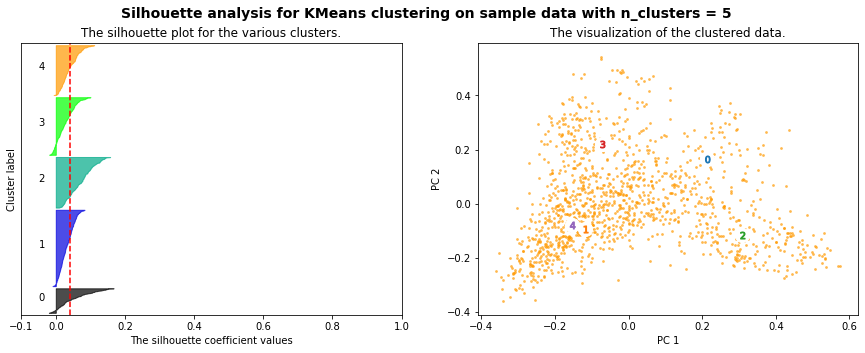

For n_clusters = 5, The average silhouette_score is : 0.042


In [88]:
X = izvestiiaTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


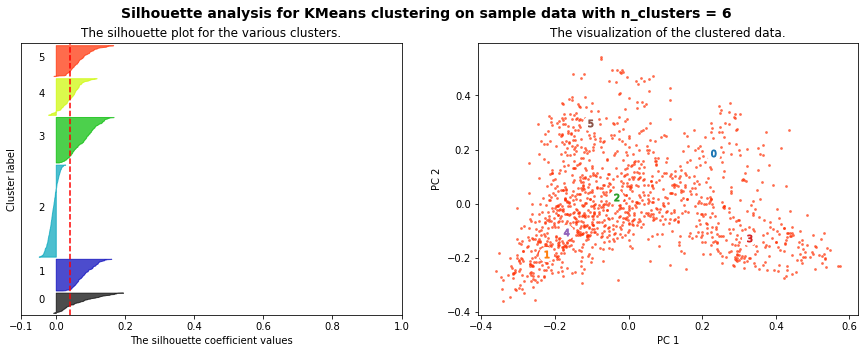

For n_clusters = 6, The average silhouette_score is : 0.042


In [89]:
X = izvestiiaTFVects.toarray()
plotSilhouette(6, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


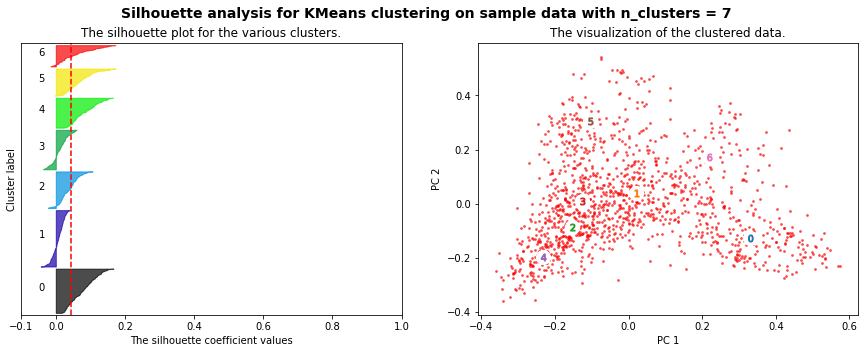

For n_clusters = 7, The average silhouette_score is : 0.044


In [90]:
X = izvestiiaTFVects.toarray()
plotSilhouette(7, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


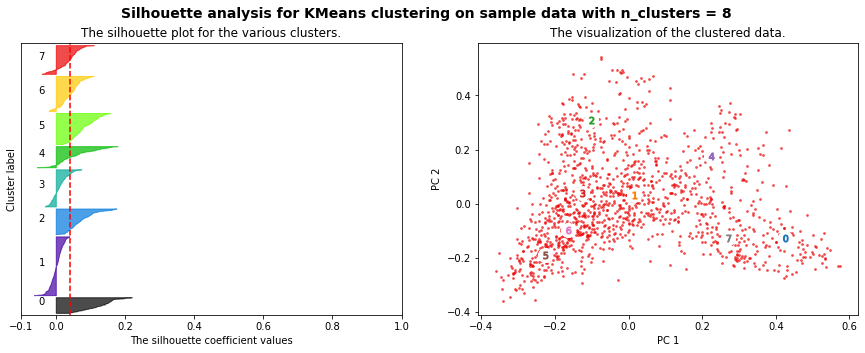

For n_clusters = 8, The average silhouette_score is : 0.041


In [91]:
X = izvestiiaTFVects.toarray()
plotSilhouette(8, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


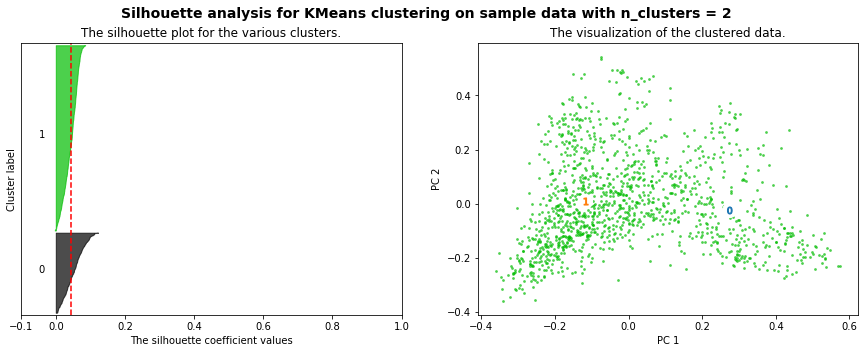

For n_clusters = 2, The average silhouette_score is : 0.045


In [92]:
X = izvestiiaTFVects.toarray()
plotSilhouette(2, X)

In [93]:
km2 = sklearn.cluster.KMeans(n_clusters=2, init='k-means++')

In [94]:
km2.fit(izvestiiaTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
# 2 clusters
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], km2.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], km2.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], km2.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], km2.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

In [96]:
#2
terms = izTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km2.cluster_centers_.argsort()[:, ::-1]
for i in range(2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 банк
 компания
 ул
 тело
 доллар
 факс
 финансовый
 миллиард
 валютный
 акция


Cluster 1:
 иа
 ие
 фильм
 цк
 депутат
 кпсс
 военный
 верховный
 ядерный
 война




What does this cluster structure reveal about the organization of documents in your corpora? 

Looking at the Silhouette analysis, and at the top terms per cluster, it becomes evident that 7 is the best number of clusters. There are 4 distinct clusters, which share minimum overlap, and three clusters that overlap a lot. However one of those three is a giberish cluster, composed of meaningless two letter combinations, such as ia, ii, ie, etc. These have no meaning (unlike an, the, or, etc), and are likely the result of poor OCR and poor source material. That it overlaps with other clusters only seems to support this conclusion, as there could well be enough text that was OCR'd properly in the document that would make it align closely with another cluster. 

At the same time, however, there is a lot of clustering towards the center, with multiple clusters overlapping, which might imply that there is less differences in my corpus than I imagined. Nevertheless, the cluster about Banks and the cluster about the Commnist Party are very strongly separated, which is not suprprising, but would have been if they were not.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

# Hierarchical Clustering with Wald's Method



In [244]:
izvestiiaTFVects

<1304x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 377774 stored elements in Compressed Sparse Row format>

In [245]:
izvestiiaTFVects[:100].todense()

matrix([[0.06926631, 0.        , 0.        , ..., 0.        , 0.        ,
         0.02619965],
        [0.05888463, 0.04843106, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.04321208, 0.        , ..., 0.        , 0.02360193,
         0.        ],
        ...,
        [0.        , 0.19288302, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.01442679, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.28661837, 0.        , ..., 0.09008101, 0.11181969,
         0.01883031]])

In [246]:
izvestiiaCoocMat = izvestiiaTFVects * izvestiiaTFVects.T
izvestiiaCoocMat.setdiag(0)

/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [247]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[161.        , 168.        ,   0.        ,   2.        ],
       [309.        , 316.        ,   0.76063627,   2.        ],
       [328.        , 350.        ,   0.76073391,   3.        ],
       [326.        , 332.        ,   0.7953707 ,   2.        ],
       [258.        , 281.        ,   0.81747286,   2.        ],
       [171.        , 187.        ,   0.82173513,   2.        ],
       [319.        , 336.        ,   0.82402228,   2.        ],
       [311.        , 317.        ,   0.83448911,   2.        ],
       [195.        , 199.        ,   0.84839645,   2.        ],
       [310.        , 353.        ,   0.84901365,   3.        ]])

In [258]:
selectIndices = []
indexToCat = []
for c in set(izvestiiadf['kmeans_predictions_7']):
    selectIndices += list(izvestiiadf[izvestiiadf['kmeans_predictions_7'] == c].index)
    indexToCat += [c]
    #.groupby('category').sum()

In [259]:
subCoocMat = izvestiiaCoocMat[selectIndices,:][:,selectIndices]

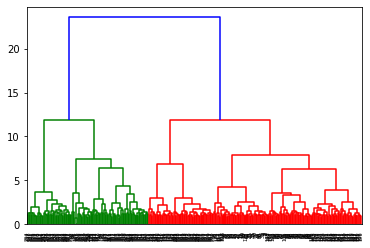

In [260]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

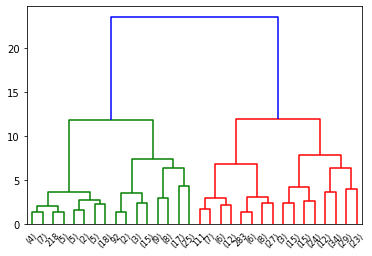

In [261]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

In [273]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 7, 'maxclust')
hierarchicalClusters

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 6, 7, 3, 7, 3, 7,
       7, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 6, 6, 7, 7,
       7, 4, 7, 7, 6, 7, 6, 7, 4, 7, 4, 4, 4, 7, 7, 6, 4, 7, 7, 4, 4, 7,
       4, 4, 4, 4, 7, 4, 7, 7, 4, 4, 7, 4, 4, 7, 4, 4, 4, 4, 7, 7, 7, 7,
       7, 3, 7, 3, 3, 2, 7, 2, 6, 2, 7, 7, 7, 7, 2, 2, 7, 7, 3, 3, 6, 7,
       7, 7, 1, 7, 3, 7, 3, 3, 3, 7, 7, 7, 7, 7, 7, 3, 3, 7, 3, 7, 7, 3,
       1, 7, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 7,
       5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 7, 4, 4, 3,

In [275]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(izvestiiaCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 7, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(izvestiiadf['category'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(izvestiiadf['category'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(izvestiiadf['category'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(izvestiiadf['category'], hierarchicalClusters_full)))

/opt/anaconda3/lib/python3.7/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.148
Completeness: 0.053
V-measure: 0.078
Adjusted Rand Score: 0.056


In [128]:
izvestiiadf['wald_predictions_7'] = hierarchicalClusters_full

In [130]:
izvestiiadf['wald_predictions_6'] = hierarchicalClusters_full

Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

So the recursive slustering seems to imply that there are two clusters to my corpus. This might be indicative of it picking up on the differences between Soviet and post-Soviet discorses in the documents. However, all of the scores are quite low, and this type of clustering does not seem to do well with my corpus. The scores seem to indicate that the clusters are neither homogeneous, nor are topics contained within single clusters. Perhaps, since my documents are single pages from a newspaper, which contain a variety of articles on them simultaneosuly, this makes recursive clustering particularly difficult, as each documents contains a variety of topics at the same time, which might also make them quite similar to one another.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

# Gensim

In [133]:
dictionary = gensim.corpora.Dictionary(izvestiiadf['lemmas'])

In [134]:
corpus = [dictionary.doc2bow(text) for text in izvestiiadf['lemmas']]

In [135]:
gensim.corpora.MmCorpus.serialize('izvestiia.mm', corpus)
izmm = gensim.corpora.MmCorpus('izvestiia.mm')

In [140]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [141]:
iz1Bow = dictionary.doc2bow(izvestiiadf['lemmas'][0])
iz1lda = izlda[iz1Bow]
print("The topics of the text: {}".format(izvestiiadf['filename'][0]))
print("are: {}".format(iz1lda))

The topics of the text: 1987 Issue 79 Page 6.txt
are: [(0, 0.32621258), (5, 0.6702171)]


In [143]:
ldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })

In [145]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,1987 Issue 219 Page 6.txt,"[(0, 0.097115636), (2, 0.0128067825), (5, 0.65...",0.097116,0.000000,0.012807,0.000000,0.000000,0.651004,0.013861,0.219584,0.000000,0.000000
101,1988 Issue 032 February 01 Page 3.txt,"[(0, 0.0635202), (1, 0.024834376), (2, 0.47314...",0.063520,0.024834,0.473147,0.000000,0.029433,0.047984,0.000000,0.230642,0.032839,0.087853
201,1989 Issue 102 April 11 Page 3.txt,"[(0, 0.46717352), (1, 0.068919204), (2, 0.0572...",0.467174,0.068919,0.057211,0.028057,0.042919,0.107408,0.000000,0.173708,0.000000,0.049442
301,1991 Issue 171 July 19 Page 6.txt,"[(0, 0.041458055), (2, 0.09649617), (5, 0.8510...",0.041458,0.000000,0.096496,0.000000,0.000000,0.851008,0.000000,0.000000,0.000000,0.000000
401,1992 Issue 169 July 24 Page 6.txt,"[(0, 0.09247065), (3, 0.28401795), (5, 0.38642...",0.092471,0.000000,0.000000,0.284018,0.000000,0.386420,0.000000,0.218493,0.000000,0.000000
501,1992 Issue 211 September 22 Page 5.txt,"[(0, 0.023489606), (1, 0.07287008), (2, 0.5769...",0.023490,0.072870,0.576940,0.000000,0.014765,0.108681,0.055440,0.062722,0.000000,0.081793
601,1994 Issue 220 November 16 Page 11.txt,"[(0, 0.08966663), (2, 0.21556607), (4, 0.28914...",0.089667,0.000000,0.215566,0.000000,0.289144,0.014673,0.043758,0.315354,0.017739,0.000000
701,1984 Issue 362 Page 3.txt,"[(0, 0.5385211), (1, 0.02582752), (2, 0.195453...",0.538521,0.025828,0.195453,0.000000,0.000000,0.020987,0.000000,0.157379,0.000000,0.050838
801,1986 Issue 360 Page 1.txt,"[(0, 0.27044243), (1, 0.026223369), (2, 0.0271...",0.270442,0.026223,0.027149,0.000000,0.000000,0.000000,0.000000,0.294042,0.000000,0.374817
901,1995 Issue 246 December 28 Page 9.txt,"[(2, 0.9981924)]",0.000000,0.000000,0.998192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [146]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.268331,0.000000,0.000000,0.0,0.000000,0.729136,0.000000,0.000000,0.000000,0.000000
1,0.097116,0.000000,0.012807,0.0,0.000000,0.651004,0.013861,0.219584,0.000000,0.000000
2,0.627360,0.015944,0.019800,0.0,0.000000,0.000000,0.317425,0.018582,0.000000,0.000000
3,0.178990,0.000000,0.174874,0.0,0.019585,0.290339,0.000000,0.304041,0.000000,0.022952
4,0.498540,0.000000,0.387687,0.0,0.000000,0.000000,0.000000,0.097902,0.015283,0.000000
5,0.019815,0.020541,0.209756,0.0,0.000000,0.322878,0.000000,0.199423,0.000000,0.208539
6,0.432236,0.094606,0.289313,0.0,0.000000,0.086629,0.000000,0.026040,0.029868,0.023332
7,0.308327,0.062219,0.353397,0.0,0.011419,0.103302,0.000000,0.094068,0.000000,0.056629
8,0.769599,0.000000,0.000000,0.0,0.000000,0.200308,0.000000,0.027992,0.000000,0.000000
9,0.114444,0.049150,0.224477,0.0,0.106726,0.300190,0.000000,0.060064,0.000000,0.119320


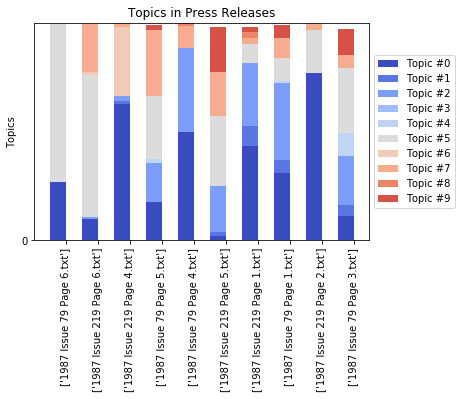

In [147]:
N = 10
ind = np.arange(N)
K = izlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

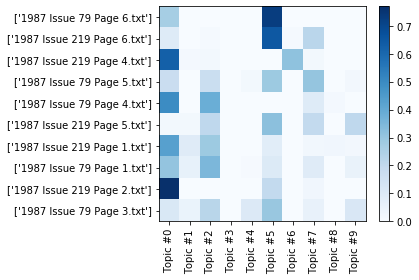

In [148]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [160]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,год,год,год,год,год,год,год,год,год,год
1,метр,страна,страна,н,метр,другой,н,ссср,метр,ссср
2,ссср,метр,человек,ссср,страна,метр,метр,страна,страна,страна
3,новый,н,ссср,метр,литр,страна,литр,другой,литр,новый
4,н,ссср,новый,литр,человек,литр,страна,метр,н,метр
5,литр,дело,банк,страна,дело,новый,ссср,дело,ссср,другой
6,время,время,другой,человек,москва,россия,время,день,новый,совет
7,страна,новый,совет,с,подобный,человек,дело,литр,первый,советский
8,работа,человек,первый,новый,новый,ссср,новый,вопрос,тонна,тонна
9,рубль,тонна,советский,совет,ссср,первый,тонна,тонна,дело,человек


We can see that several of the topics have the same top words, but there are definitely differences. We can try and make the topics more distinct by changing the $\alpha$ and $\eta$ parameters of the model. $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings.

<Figure size 432x288 with 0 Axes>

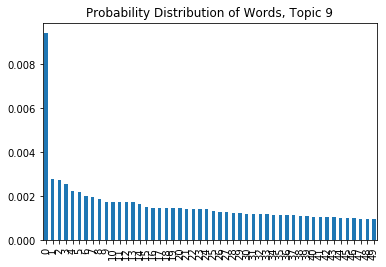

In [161]:
topic9_df = pandas.DataFrame(izlda.show_topic(9, topn=50))
plt.figure()
topic9_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 9')
plt.show()

In [162]:
izlda1 = gensim.models.ldamodel.LdaModel(corpus=izmm, id2word=dictionary, num_topics=10, eta = 0.00001)
izlda2 = gensim.models.ldamodel.LdaModel(corpus=izmm, id2word=dictionary, num_topics=10, eta = 0.9)

In [163]:
topicsDict = {}
for topicNum in range(izlda1.num_topics):
    topicWords = [w for w, p in izlda1.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF1 = pandas.DataFrame(topicsDict)
wordRanksDF1

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,год,год,год,год,год,год,год,год,год,год
1,ссср,метр,ссср,метр,другой,метр,страна,ссср,страна,литр
2,другой,н,человек,ссср,ссср,страна,метр,литр,другой,метр
3,тонна,страна,другой,страна,время,новый,ссср,метр,первый,дело
4,новый,ссср,новый,литр,страна,ссср,новый,страна,москва,новый
5,метр,литр,время,россия,метр,н,работа,новый,время,россия
6,дело,новый,первый,советский,н,другой,время,н,н,тонна
7,н,советский,стать,человек,человек,литр,н,советский,новый,н
8,страна,подобный,метр,совет,дело,человек,другой,дело,человек,ссср
9,работа,совет,много,тонна,новый,время,человек,тонна,ссср,страна


In [164]:
topicsDict = {}
for topicNum in range(izlda2.num_topics):
    topicWords = [w for w, p in izlda2.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF2 = pandas.DataFrame(topicsDict)
wordRanksDF2

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,год,год,год,год,год,год,год,год,год,год
1,страна,метр,метр,ссср,метр,банк,ссср,метр,н,ссср
2,литр,ссср,страна,метр,ссср,другой,страна,страна,советский,время
3,н,человек,новый,н,другой,н,метр,новый,ссср,страна
4,новый,время,другой,новый,страна,метр,другой,человек,литр,метр
5,первый,тонна,ссср,дело,литр,страна,время,ссср,человек,другой
6,ссср,страна,совет,человек,новый,дело,литр,другой,метр,тонна
7,тонна,советский,н,страна,человек,ссср,дело,день,страна,н
8,человек,н,россия,стать,день,человек,новый,россия,новый,новый
9,совет,новый,москва,литр,тонна,новый,н,литр,другой,совет


In [166]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

izvestiiadf['reduced_tokens'] = izvestiiadf['lemmas'].apply(lambda x: dropMissing(x, izTFVectorizer.vocabulary_.keys()))

In [167]:
izvestiiadf

,text,year,filename,type,category,clean_text2,tokenized,lemmas,lemmas_string,kmeans_predictions,kmeans_predictions_6,kmeans_predictions_7,wald_predictions_7,wald_predictions_6,reduced_tokens
0,"№ 79\t•\t19 марта 1987 года\n\nФУТБОЛ: ИГРА, Б...",1987,1987 Issue 79 Page 6.txt,Communist,True,марта годаФУТБОЛ ИГРА БОРЬБА ПРАЗДНИКТУРЕЦК...,"[марта, годаФУТБОЛ, ИГРА, БОРЬБА, ПРАЗДНИКТУРЕ...","[март, годафутбол, игра, борьба, праздниктурец...",март годафутбол игра борьба праздниктурецкий ф...,3,4,5,3,3,"[март, игра, борьба, уметь, совсем, минута, ма..."
1,а.'\n\n\t'а'\t'\n\n\t\t\t\t Подробности длл\n\...,1987,1987 Issue 219 Page 6.txt,Communist,True,аа Подробности дллСто пятьдесят переговоров со...,"[аа, Подробности, дллСто, пятьдесят, переговор...","[аа, подробность, дллсто, переговоры, состоять...",аа подробность дллсто переговоры состояться ив...,3,4,5,3,3,"[аа, переговоры, состояться, ив, компания, фил..."
2,известии \t ...\n\nСовместное советско- малайз...,1987,1987 Issue 219 Page 4.txt,Communist,True,известии Совместное советско малайзийское ком...,"[известии, Совместное, советско, малайзийское,...","[известия, совместный, советский, малайзийский...",известия совместный советский малайзийский ком...,4,5,0,2,2,"[совместный, июль, август, официальный, визит,..."
3,’ ИЗВЕСТИЯ\t■ - ■ по странам и континентам\t\t...,1987,1987 Issue 79 Page 5.txt,Communist,True,ИЗВЕСТИЯ по странам и континентам марта ...,"[ИЗВЕСТИЯ, по, странам, и, континентам, марта,...","[известие, страна, континент, март, год, отзву...",известие страна континент март год отзвучать п...,0,1,3,2,2,"[март, речь, ся, технический, подчеркнуть, мом..."
4,ИЗВЕСТИЯ\n\n\tГ! О СТРАНАМ ИР НСНТИНЕНТАМ —— 2...,1987,1987 Issue 79 Page 4.txt,Communist,True,ИЗВЕСТИЯГ О СТРАНАМ ИР НСНТИНЕНТАМ марта...,"[ИЗВЕСТИЯГ, О, СТРАНАМ, ИР, НСНТИНЕНТАМ, марта...","[известияг, страна, ир, нснтинент, март, год, ...",известияг страна ир нснтинент март год телетай...,4,5,0,2,2,"[март, зал, март, тасса, доверие, вечер, кабин..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...,2,2,4,7,6,"[март, кандидат, оценка, учитывать, среда, пок..."
1300,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...,0,1,3,5,4,"[январь, соответствие, проведение, конкурс, лу..."
1301,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...,0,1,3,5,4,"[март, реклама, назвать, никто, никогда, амери..."
1302,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...,1,3,6,7,6,"[ноябрь, парламент, александр, визит, корреспо..."


In [276]:
dictionary = gensim.corpora.Dictionary(izvestiiadf['reduced_tokens'])

In [277]:
corpus = [dictionary.doc2bow(text) for text in izvestiiadf['reduced_tokens']]

In [278]:
gensim.corpora.MmCorpus.serialize('izmm.mm', corpus)
izrmm = gensim.corpora.MmCorpus('izmm.mm')

In [172]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=7, alpha='auto', eta='auto')

In [173]:
iz1Bow = dictionary.doc2bow(izvestiiadf['reduced_tokens'][0])
iz1lda = izlda[iz1Bow]
print("The topics of the text: {}".format(izvestiiadf['filename'][0]))
print("are: {}".format(iz1lda))

The topics of the text: 1987 Issue 79 Page 6.txt
are: [(0, 0.019853437), (1, 0.1388807), (2, 0.2084951), (3, 0.092614114), (4, 0.5143784), (6, 0.017223066)]


In [174]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['reduced_tokens']]
    })

In [175]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
1,1987 Issue 219 Page 6.txt,"[(0, 0.16619457), (1, 0.35188028), (4, 0.47228...",0.166195,0.351880,0.000000,0.000000,0.472283,0.000000,0.000000
101,1988 Issue 032 February 01 Page 3.txt,"[(0, 0.2562397), (1, 0.039864972), (2, 0.24343...",0.256240,0.039865,0.243433,0.086254,0.072531,0.100067,0.201610
201,1989 Issue 102 April 11 Page 3.txt,"[(0, 0.0394492), (2, 0.03248172), (3, 0.168858...",0.039449,0.000000,0.032482,0.168859,0.500989,0.169380,0.080227
301,1991 Issue 171 July 19 Page 6.txt,"[(0, 0.06911054), (1, 0.050970677), (2, 0.1144...",0.069111,0.050971,0.114492,0.013471,0.599680,0.082484,0.069791
401,1992 Issue 169 July 24 Page 6.txt,"[(0, 0.04914665), (1, 0.050905555), (2, 0.2011...",0.049147,0.050906,0.201188,0.000000,0.566744,0.063305,0.067406
501,1992 Issue 211 September 22 Page 5.txt,"[(0, 0.15072812), (1, 0.023165442), (2, 0.3394...",0.150728,0.023165,0.339475,0.122941,0.061493,0.188440,0.113758
601,1994 Issue 220 November 16 Page 11.txt,"[(1, 0.61320055), (3, 0.35823184), (6, 0.01281...",0.000000,0.613201,0.000000,0.358232,0.000000,0.000000,0.012817
701,1984 Issue 362 Page 3.txt,"[(0, 0.060362384), (3, 0.15058164), (4, 0.1807...",0.060362,0.000000,0.000000,0.150582,0.180727,0.532045,0.067715
801,1986 Issue 360 Page 1.txt,"[(0, 0.17609568), (2, 0.07543703), (3, 0.08380...",0.176096,0.000000,0.075437,0.083803,0.039579,0.619368,0.000000
901,1995 Issue 246 December 28 Page 9.txt,"[(0, 0.02046023), (1, 0.765321), (2, 0.0278732...",0.020460,0.765321,0.027873,0.172352,0.000000,0.000000,0.000000


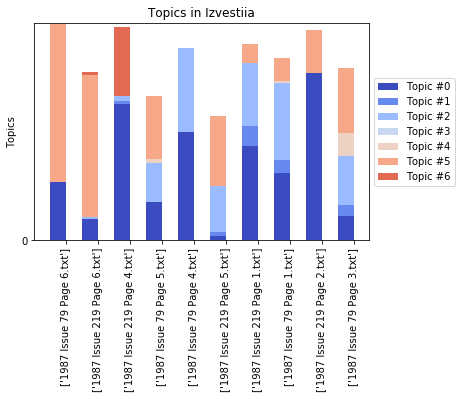

In [176]:
N = 10
ind = np.arange(N)
K = izlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Izvestiia')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

In [177]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,фильм,банк,банк,банк,ие,депутат,ул
1,банк,иа,компания,доллар,иа,иа,тело
2,иа,компания,иа,финансовый,закон,доллар,доллар
3,депутат,закон,война,иа,война,банк,верховный
4,цк,фильм,цк,военный,цк,фонд,банк
5,проект,фонд,кпсс,миллиард,банк,цк,миллиард
6,доллар,миллиард,писать,акция,экономика,комиссия,депутат
7,основа,товар,финансовый,компания,депутат,кпсс,закон
8,товар,иностранный,тело,деньги,деньги,ие,цк
9,закон,верховный,военный,депутат,доллар,орган,суд


Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  


In [318]:
dictionary = gensim.corpora.Dictionary(izvestiiadf['lemmas'])

In [319]:
corpus = [dictionary.doc2bow(text) for text in izvestiiadf['lemmas']]

In [320]:
gensim.corpora.MmCorpus.serialize('izmm.mm', corpus)
izrmm = gensim.corpora.MmCorpus('izmm.mm')

In [321]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=2, alpha='auto', eta='auto')

In [322]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })

In [323]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]

,name,topics,topic_0,topic_1
708,1984 Issue 082 Page 2.txt,"[(0, 0.6616362), (1, 0.3383638)]",0.661636,0.338364
724,1985 Issue 165 Page 6.txt,"[(0, 0.049034495), (1, 0.95096546)]",0.049034,0.950965
814,1986 Issue 276 Page 4.txt,"[(0, 0.70060664), (1, 0.29939342)]",0.700607,0.299393
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.6340288), (1, 0.36597115)]",0.634029,0.365971
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.41808242), (1, 0.5819175)]",0.418082,0.581918
273,1990 Issue 280 October 08 Page 1.txt,"[(1, 0.9961119)]",0.000000,0.996112
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.4347959), (1, 0.56520414)]",0.434796,0.565204
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.5290921), (1, 0.4709079)]",0.529092,0.470908
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.90875316), (1, 0.09124688)]",0.908753,0.091247
925,1995 Issue 151 August 15 Page 13.txt,"[(1, 0.9974811)]",0.000000,0.997481


In [324]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1
0,год,год
1,страна,метр
2,другой,ссср
3,ссср,литр
4,новый,новый
5,н,человек
6,россия,страна
7,дело,н
8,вопрос,тонна
9,человек,время


In [330]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=3, alpha='auto', eta='auto')

In [331]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })

In [332]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2
708,1984 Issue 082 Page 2.txt,"[(0, 0.36528596), (1, 0.5916044), (2, 0.043109...",0.365286,0.591604,0.043110
724,1985 Issue 165 Page 6.txt,"[(0, 0.71842724), (1, 0.25333658), (2, 0.02823...",0.718427,0.253337,0.028236
814,1986 Issue 276 Page 4.txt,"[(0, 0.4818604), (1, 0.44142735), (2, 0.076712...",0.481860,0.441427,0.076712
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.8941677), (1, 0.085416056), (2, 0.02041...",0.894168,0.085416,0.020416
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.83921355), (1, 0.08401443), (2, 0.07677...",0.839214,0.084014,0.076772
273,1990 Issue 280 October 08 Page 1.txt,"[(0, 0.016368741), (1, 0.27430624), (2, 0.7093...",0.016369,0.274306,0.709325
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.8427008), (1, 0.108935684), (2, 0.04836...",0.842701,0.108936,0.048364
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.742266), (1, 0.064786345), (2, 0.192947...",0.742266,0.064786,0.192948
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.7550655), (1, 0.19243476), (2, 0.052499...",0.755066,0.192435,0.052500
925,1995 Issue 151 August 15 Page 13.txt,"[(0, 0.08714302), (1, 0.77212936), (2, 0.14072...",0.087143,0.772129,0.140728


In [333]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2
0,год,год,год
1,ссср,страна,метр
2,метр,литр,страна
3,новый,метр,н
4,другой,человек,ссср
5,страна,ссср,литр
6,н,время,другой
7,человек,новый,новый
8,дело,совет,тонна
9,советский,советский,дело


In [334]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=4, alpha='auto', eta='auto')

In [335]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })


In [336]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]


,name,topics,topic_0,topic_1,topic_2,topic_3
708,1984 Issue 082 Page 2.txt,"[(0, 0.92052364), (1, 0.016053475), (2, 0.0186...",0.920524,0.016053,0.018640,0.044783
724,1985 Issue 165 Page 6.txt,"[(0, 0.15274699), (2, 0.5142569), (3, 0.331775...",0.152747,0.000000,0.514257,0.331775
814,1986 Issue 276 Page 4.txt,"[(0, 0.1747606), (1, 0.048492573), (3, 0.77258...",0.174761,0.048493,0.000000,0.772587
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.4502592), (1, 0.18448786), (2, 0.101465...",0.450259,0.184488,0.101466,0.263787
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.614087), (1, 0.029975507), (2, 0.050233...",0.614087,0.029976,0.050233,0.305704
273,1990 Issue 280 October 08 Page 1.txt,"[(0, 0.010908307), (3, 0.9885601)]",0.010908,0.000000,0.000000,0.988560
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.68837196), (2, 0.16972707), (3, 0.14063...",0.688372,0.000000,0.169727,0.140636
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.18871473), (1, 0.39110377), (2, 0.07935...",0.188715,0.391104,0.079358,0.340823
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.40400156), (1, 0.41172996), (2, 0.07838...",0.404002,0.411730,0.078387,0.105881
925,1995 Issue 151 August 15 Page 13.txt,"[(0, 0.47954226), (1, 0.010528911), (3, 0.5061...",0.479542,0.010529,0.000000,0.506141


In [337]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF


,Topic_0,Topic_1,Topic_2,Topic_3
0,год,год,год,год
1,страна,человек,литр,метр
2,метр,новый,тонна,ссср
3,ссср,метр,другой,страна
4,новый,н,москва,другой
5,другой,ссср,н,н
6,дело,страна,страна,советский
7,н,дело,россия,время
8,литр,совет,метр,тонна
9,время,россия,ссср,первый


In [338]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')


In [339]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })


In [340]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]


,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4
708,1984 Issue 082 Page 2.txt,"[(0, 0.04914843), (1, 0.19196352), (2, 0.07863...",0.049148,0.191964,0.078635,0.299811,0.380441
724,1985 Issue 165 Page 6.txt,"[(0, 0.022313705), (1, 0.11480835), (2, 0.0251...",0.022314,0.114808,0.025131,0.048887,0.788860
814,1986 Issue 276 Page 4.txt,"[(0, 0.052116096), (1, 0.050892018), (2, 0.142...",0.052116,0.050892,0.142352,0.458920,0.295720
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.026618665), (1, 0.04497927), (2, 0.7193...",0.026619,0.044979,0.719351,0.079302,0.129750
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.017183403), (1, 0.017913764), (2, 0.055...",0.017183,0.017914,0.055973,0.641137,0.267793
273,1990 Issue 280 October 08 Page 1.txt,"[(3, 0.99925077)]",0.000000,0.000000,0.000000,0.999251,0.000000
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.07245283), (1, 0.69430095), (2, 0.14016...",0.072453,0.694301,0.140166,0.027101,0.065979
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.018051488), (1, 0.30644265), (2, 0.4399...",0.018051,0.306443,0.439930,0.108086,0.127490
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.06557148), (1, 0.026978778), (2, 0.4056...",0.065571,0.026979,0.405687,0.189001,0.312762
925,1995 Issue 151 August 15 Page 13.txt,"[(0, 0.34577832), (1, 0.47175416), (2, 0.14177...",0.345778,0.471754,0.141779,0.000000,0.038881


In [341]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,год,год,год,год,год
1,ссср,ссср,новый,ссср,страна
2,метр,метр,метр,метр,другой
3,другой,страна,россия,страна,человек
4,страна,человек,страна,время,метр
5,новый,литр,н,литр,н
6,москва,другой,работа,подобный,советский
7,н,н,ссср,н,литр
8,совет,время,литр,совет,тонна
9,советский,дело,человек,дело,новый


In [342]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=6, alpha='auto', eta='auto')

In [343]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf['lemmas']]
    })


In [344]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]


,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
708,1984 Issue 082 Page 2.txt,"[(0, 0.19523281), (1, 0.22284168), (2, 0.06570...",0.195233,0.222842,0.065706,0.030866,0.011389,0.473964
724,1985 Issue 165 Page 6.txt,"[(0, 0.78879124), (1, 0.048508085), (3, 0.0582...",0.788791,0.048508,0.000000,0.058250,0.012952,0.084980
814,1986 Issue 276 Page 4.txt,"[(0, 0.2967387), (1, 0.12321242), (2, 0.010723...",0.296739,0.123212,0.010723,0.516171,0.000000,0.053016
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.459278), (1, 0.34994617), (2, 0.0132305...",0.459278,0.349946,0.013231,0.000000,0.000000,0.173461
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.15412213), (1, 0.23778844), (2, 0.36236...",0.154122,0.237788,0.362367,0.012604,0.000000,0.232836
273,1990 Issue 280 October 08 Page 1.txt,"[(2, 0.3217389), (4, 0.6776979)]",0.000000,0.000000,0.321739,0.000000,0.677698,0.000000
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.021758385), (1, 0.75833386), (2, 0.0277...",0.021758,0.758334,0.027798,0.187260,0.000000,0.000000
492,1992 Issue 211 September 22 Page 6.txt,"[(1, 0.83335483), (2, 0.06720865), (3, 0.04297...",0.000000,0.833355,0.067209,0.042977,0.000000,0.051675
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.18165134), (1, 0.75859076), (2, 0.02598...",0.181651,0.758591,0.025986,0.016524,0.000000,0.017092
925,1995 Issue 151 August 15 Page 13.txt,"[(2, 0.86797523), (3, 0.13041598)]",0.000000,0.000000,0.867975,0.130416,0.000000,0.000000


In [345]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,год,год,год,год,год,год
1,ссср,новый,страна,страна,метр,страна
2,метр,ссср,метр,метр,н,ссср
3,человек,метр,литр,новый,ссср,н
4,дело,другой,н,тонна,страна,новый
5,другой,литр,ссср,другой,литр,совет
6,советский,страна,другой,человек,новый,советский
7,страна,день,тонна,литр,человек,с
8,новый,н,человек,время,время,человек
9,день,россия,дело,москва,другой,подобный


In [346]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=7, alpha='auto', eta='auto')

In [347]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf["lemmas"]]
    })


In [348]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]


,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6
708,1984 Issue 082 Page 2.txt,"[(0, 0.114721954), (3, 0.08311486), (4, 0.0834...",0.114722,0.000000,0.000000,0.083115,0.083451,0.696110,0.017146
724,1985 Issue 165 Page 6.txt,"[(1, 0.020064866), (3, 0.9143042), (5, 0.05778...",0.000000,0.020065,0.000000,0.914304,0.000000,0.057783,0.000000
814,1986 Issue 276 Page 4.txt,"[(0, 0.011023519), (3, 0.046332173), (4, 0.050...",0.011024,0.000000,0.000000,0.046332,0.050105,0.768090,0.119887
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.04735214), (4, 0.013061833), (5, 0.3845...",0.047352,0.000000,0.000000,0.000000,0.013062,0.384502,0.540513
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.026085516), (2, 0.1309106), (3, 0.04752...",0.026086,0.000000,0.130911,0.047523,0.160607,0.544119,0.090540
273,1990 Issue 280 October 08 Page 1.txt,"[(0, 0.7300056), (2, 0.077730335), (4, 0.19050...",0.730006,0.000000,0.077730,0.000000,0.190504,0.000000,0.000000
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.04203289), (1, 0.027022496), (3, 0.0170...",0.042033,0.027022,0.000000,0.017054,0.230556,0.272922,0.409188
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.46990478), (2, 0.07191979), (3, 0.02321...",0.469905,0.000000,0.071920,0.023214,0.142401,0.164619,0.124731
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.21771753), (3, 0.011413046), (4, 0.0372...",0.217718,0.000000,0.000000,0.011413,0.037266,0.666272,0.065871
925,1995 Issue 151 August 15 Page 13.txt,"[(0, 0.03423103), (4, 0.9603262)]",0.034231,0.000000,0.000000,0.000000,0.960326,0.000000,0.000000


In [349]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6
0,год,год,год,год,год,год,год
1,метр,другой,страна,ссср,метр,страна,страна
2,новый,ссср,метр,человек,литр,ссср,метр
3,н,человек,ссср,н,страна,совет,н
4,страна,литр,новый,метр,другой,новый,тонна
5,литр,н,день,новый,н,метр,ссср
6,время,дело,первый,дело,ссср,другой,новый
7,день,москва,человек,литр,новый,советский,другой
8,тонна,время,россия,россия,человек,вопрос,человек
9,россия,тонна,советский,другой,время,литр,первый


So at this point in time it seemed that just changing the number of topics and leaving alpha and eta on auto was not generating good topics. In fact I could hardly discern the differences between them. The percentages seemed to be shifting between various documents, but the topics did not seem to be varying in the most important words. So I decided to play around with the various parameters until/if I got a good set of topics.

In [398]:
izlda = gensim.models.ldamodel.LdaModel(corpus=izrmm, id2word=dictionary, num_topics=15, alpha= "auto", eta= "auto")

In [399]:
RldaDF = pandas.DataFrame({
        'name' : izvestiiadf['filename'],
        'topics' : [izlda[dictionary.doc2bow(l)] for l in izvestiiadf["lemmas"]]
    })

In [400]:
topicsDict = {}
for topicNum in range(izlda.num_topics):
    topicWords = [w for w, p in izlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF



,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14
0,год,год,год,год,год,год,год,год,год,год,год,год,год,год,год
1,ссср,страна,метр,метр,страна,ссср,страна,страна,страна,н,ссср,метр,новый,страна,новый
2,страна,другой,литр,другой,метр,страна,другой,новый,ссср,страна,н,литр,страна,ссср,н
3,метр,ссср,человек,страна,н,дело,ссср,метр,банк,ссср,новый,ссср,метр,метр,метр
4,другой,метр,другой,первый,ссср,метр,новый,другой,день,человек,метр,н,н,новый,тонна
5,новый,дело,н,литр,время,другой,литр,ссср,другой,литр,литр,совет,человек,человек,литр
6,человек,человек,страна,ссср,литр,новый,н,н,первый,время,советский,человек,ссср,первый,страна
7,совет,н,тонна,н,человек,тонна,мир,тонна,время,метр,время,время,дело,другой,время
8,москва,новый,время,день,россия,работа,метр,дело,россия,новый,тонна,новый,другой,день,с
9,советский,тонна,россия,человек,новый,н,советский,совет,новый,другой,подобный,другой,литр,совет,советский


In [401]:
topicsProbDict = {i : [0] * len(RldaDF) for i in range(izlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(RldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(izlda.num_topics):
    RldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

RldaDF[1::100]


,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
708,1984 Issue 082 Page 2.txt,"[(0, 0.40223974), (2, 0.040063884), (4, 0.0682...",0.402240,0.000000,0.040064,0.000000,0.068285,0.222650,0.000000,0.020481,0.000000,0.0,0.037990,0.025685,0.000000,0.020819,0.137096
724,1985 Issue 165 Page 6.txt,"[(0, 0.10634957), (2, 0.020673247), (3, 0.0276...",0.106350,0.000000,0.020673,0.027628,0.487046,0.029062,0.000000,0.011741,0.000000,0.0,0.000000,0.228977,0.000000,0.000000,0.070433
814,1986 Issue 276 Page 4.txt,"[(0, 0.0386132), (1, 0.06428156), (3, 0.333095...",0.038613,0.064282,0.000000,0.333096,0.032347,0.037108,0.179245,0.012143,0.000000,0.0,0.206799,0.021235,0.000000,0.016935,0.040811
110,1988 Issue 004 January 04 Page 2.txt,"[(0, 0.38980466), (1, 0.031232573), (2, 0.0152...",0.389805,0.031233,0.015251,0.013775,0.062362,0.056354,0.000000,0.066407,0.025439,0.0,0.034705,0.055313,0.000000,0.021692,0.217421
219,1989 Issue 214 August 01 Page 2.txt,"[(0, 0.07559423), (1, 0.028875643), (3, 0.0163...",0.075594,0.028876,0.000000,0.016320,0.123149,0.068354,0.000000,0.015436,0.187738,0.0,0.109841,0.095176,0.000000,0.068264,0.208271
273,1990 Issue 280 October 08 Page 1.txt,"[(4, 0.6756165), (11, 0.3209492)]",0.000000,0.000000,0.000000,0.000000,0.675617,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.320949,0.000000,0.000000,0.000000
389,1991 Issue 240 October 08 Page 7.txt,"[(0, 0.012786829), (1, 0.14322132), (2, 0.0517...",0.012787,0.143221,0.051716,0.037278,0.508510,0.000000,0.021900,0.103778,0.024349,0.0,0.016689,0.000000,0.018745,0.035012,0.012670
492,1992 Issue 211 September 22 Page 6.txt,"[(0, 0.054441154), (1, 0.41008475), (2, 0.0311...",0.054441,0.410085,0.031130,0.092312,0.080782,0.032232,0.111242,0.000000,0.039414,0.0,0.000000,0.000000,0.000000,0.078484,0.057991
624,1994 Issue 163 August 26 Page 4.txt,"[(0, 0.045127857), (1, 0.032756973), (2, 0.036...",0.045128,0.032757,0.036972,0.015679,0.301598,0.066693,0.000000,0.000000,0.036548,0.0,0.000000,0.000000,0.000000,0.000000,0.445306
925,1995 Issue 151 August 15 Page 13.txt,"[(0, 0.043794718), (1, 0.019609971), (2, 0.089...",0.043795,0.019610,0.089279,0.133620,0.570949,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010215,0.123956


What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst. 

So I messed around with the parameters for a while, hoping to generate a good set of topics, rather than what I kept getting. I am not sure if I am doing something wrong, or if the model that I am using is just not suited for the data that I have. When I went through this process for dynamic topic modelling, everything seemed to work much much nicer, and the set of topics created are meaningful and interesting. That is not the case here. The topics, no matter what the $\alpha$, $\eta$, and topic number are, do not seem to change much, if at all. The only significant area od difference is when topics are reduced to just 2, in which case there does seem to be a greater amount of difference between the topics. 

Even increasing the number of topics to 15, and playing around with very large and very small and kinda everything in the middle for $\alpha$ and $\eta$ did not change the topics significantly. As you can see, the most important word for every topic is the same. That's not good.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

## Extending Topic Models within broader research pipelines


In [178]:
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

In [179]:
df = izvestiiadf

In [183]:
df.sort_values(by=['filename'], inplace=True)
df

,text,year,filename,type,category,clean_text2,tokenized,lemmas,lemmas_string,kmeans_predictions,kmeans_predictions_6,kmeans_predictions_7,wald_predictions_7,wald_predictions_6,reduced_tokens
704,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИ\n\nЛЛДИН мз «Днем...,1984,1984 Issue 082 Page 1.txt,Communist,True,ПРАВОВОЕ ВОСПИТАНИЕ МОЛОДЕЖИЛЛДИН мз Днем депу...,"[ПРАВОВОЕ, ВОСПИТАНИЕ, МОЛОДЕЖИЛЛДИН, мз, Днем...","[правовой, воспитание, молодежиллдин, мз, день...",правовой воспитание молодежиллдин мз день депу...,5,0,1,1,1,"[правовой, депутат, посвятить, правовой, сср, ..."
708,"ЗЕМЛЯ, ПЛАН И ЛЮДИ\n\nМЫ ЛЮБИМ говорить: земля...",1984,1984 Issue 082 Page 2.txt,Communist,True,ЗЕМЛЯ ПЛАН И ЛЮДИМЫ ЛЮБИМ говорить земля наше ...,"[ЗЕМЛЯ, ПЛАН, И, ЛЮДИМЫ, ЛЮБИМ, говорить, земл...","[земля, план, людимый, любить, говорить, земля...",земля план людимый любить говорить земля главн...,5,0,1,1,1,"[земля, земля, главное, земля, обращаться, тру..."
711,В Президиумах Доеных Советов союзных республик...,1984,1984 Issue 082 Page 3.txt,Communist,True,В Президиумах Доеных Советов союзных республик...,"[В, Президиумах, Доеных, Советов, союзных, рес...","[президиум, доеный, совет, союзный, республику...",президиум доеный совет союзный республикукраин...,0,1,1,1,1,"[президиум, союзный, очередной, заседание, пре..."
699,по странам и континентам\n\nновости\n\n\t\t\t\...,1984,1984 Issue 082 Page 4.txt,Communist,True,по странам и континентамновостиЛАОСПУТЬ БОРЬБЫ...,"[по, странам, и, континентамновостиЛАОСПУТЬ, Б...","[страна, континентамновостилаоспуть, борьба, и...",страна континентамновостилаоспуть борьба ишвец...,4,5,0,2,2,"[борьба, март, тасса, обращение, социалистичес..."
703,Фотоатлас «Известий»\n\nВьетнам\n\nИзо дня в д...,1984,1984 Issue 082 Page 5.txt,Communist,True,Фотоатлас ИзвестийВьетнамИзо дня в дань крепну...,"[Фотоатлас, ИзвестийВьетнамИзо, дня, в, дань, ...","[фотоатлас, известийтнийтнамиз, день, дань, кр...",фотоатлас известийтнийтнамиз день дань крепнут...,4,5,0,2,2,"[дружба, сотрудничество, социалистический, тру..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,﻿№ 94 •\nИЗВЕСТИЯ\n22 мая 1997 года • 4^\nИрин...,1997,1997 Issue 94 May 22 Page 5.txt,Democratic,False,ИЗВЕСТИЯ мая года Ирина СУВОРОВА Илья ХАИТ...,"[ИЗВЕСТИЯ, мая, года, Ирина, СУВОРОВА, Илья, Х...","[известие, май, год, ирина, суворовый, илья, х...",известие май год ирина суворовый илья хаить ис...,0,1,3,5,4,"[май, сложный, задача, стоять, институт, собст..."
1191,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt,Democratic,False,ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ ЗАИНТЕРЕСО...,"[ИЗВЕСТИЯБОЛЬШИЕОЗМОЖНОСТИРОСТАДЛЯ, ЗАИНТЕРЕСО...","[известиябольшие-зможташтадтадля, заинтересова...",известиябольшие-зможташтадтадля заинтересованн...,0,1,3,4,4,"[торговый, работник, компания, владелец, марка..."
1197,﻿БРОКЕРСКАЯ КОМПАНИЯ\nФЫОЧ1РСЫ и ОПЦИОНЫ на АК...,1997,1997 Issue 94 May 22 Page 7.txt,Democratic,False,БРОКЕРСКАЯ КОМПАНИЯФЫОЧРСЫ и ОПЦИОНЫ на АКЦИИ ...,"[БРОКЕРСКАЯ, КОМПАНИЯФЫОЧРСЫ, и, ОПЦИОНЫ, на, ...","[брокерский, компанияфыочрс, опцион, акция, гк...",брокерский компанияфыочрс опцион акция гко дол...,2,2,4,7,6,"[акция, спрос, май, деньги, объем, инвестиция,..."
1295,"﻿II • 22 мая 1997 г., четверг\nБИЗНЕС И ЭКОНОМ...",1997,1997 Issue 94 May 22 Page 8.txt,Democratic,False,мая г четвергБИЗНЕС И ЭКОНОМИКАФИНАНСОВЫЕ ...,"[мая, г, четвергБИЗНЕС, И, ЭКОНОМИКАФИНАНСОВЫЕ...","[май, год, четвергбизнес, экономикафинансовый,...",май год четвергбизнес экономикафинансовый изве...,2,2,4,7,6,"[май, намерен, намерен, состоять, самолет, соо..."


In [187]:
df["year"].value_counts()

1995    172
1996    148
1997    115
1992    107
1991     96
1989     90
1987     78
1986     78
1985     78
1990     77
1993     72
1994     71
1984     66
1988     56
Name: year, dtype: int64

In [202]:
docs_per_time_slice = [66, 78, 78, 78, 56, 90, 77, 96, 107, 72, 71, 172, 148, 115]

In [196]:
dictionary = gensim.corpora.Dictionary(df['reduced_tokens'])

In [197]:
corpus = [dictionary.doc2bow(text) for text in df['reduced_tokens']]

In [198]:
gensim.corpora.MmCorpus.serialize('df.mm', corpus)
dfcorpus = gensim.corpora.MmCorpus('df.mm')

In [199]:
from gensim.models import ldaseqmodel

In [203]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=docs_per_time_slice, num_topics=7)

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)
/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * t

In [204]:
ldaseq.print_topics(time=0)[1]

[('цк', 0.013803349028533776),
 ('ядерный', 0.010464354519490104),
 ('американский', 0.01043643674080251),
 ('военный', 0.009458386760009138),
 ('сотрудничество', 0.009229991189839132),
 ('оружие', 0.008399862851496725),
 ('война', 0.008104496263415056),
 ('секретарь', 0.007996919790558285),
 ('кпсс', 0.0077656026294262775),
 ('социалистический', 0.007253756108565056),
 ('вооружение', 0.007137021567233279),
 ('безопасность', 0.006350646049797918),
 ('делегация', 0.006149230397427781),
 ('тасса', 0.006136615718094451),
 ('заместитель', 0.006022290193511428),
 ('иа', 0.006002548080020149),
 ('корр', 0.005608529322219368),
 ('европа', 0.005584476367113734),
 ('генеральный', 0.005426340867554534),
 ('состояться', 0.005423343352251719)]

In [205]:
 ldaseq.print_topics(time=4)[1]

[('военный', 0.009166296355504729),
 ('ядерный', 0.008840829049650504),
 ('цк', 0.00834048345341559),
 ('сотрудничество', 0.007950911362311866),
 ('переговоры', 0.007948766447872204),
 ('американский', 0.007466404740947022),
 ('иностранный', 0.00701999576623906),
 ('оружие', 0.006645225871195564),
 ('вооружение', 0.006198328563363535),
 ('безопасность', 0.006034933145952881),
 ('секретарь', 0.005960782837771448),
 ('договор', 0.0058507507748517314),
 ('европа', 0.005532561230083699),
 ('война', 0.005368122768151349),
 ('состояться', 0.005303247442414017),
 ('визит', 0.005279111082663406),
 ('заявить', 0.005168956677608278),
 ('оон', 0.005148684773251256),
 ('иа', 0.005056203744013598),
 ('кпсс', 0.005045821767547531)]

In [206]:
ldaseq.save("ldaseqmodel")

In [207]:
loaded_model = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")

In [209]:
ldaseq.print_topics(time=0)[6]

[('банк', 0.05627958901203697),
 ('биржа', 0.020226654273647397),
 ('ул', 0.01601643260583703),
 ('доллар', 0.015310165173691518),
 ('акция', 0.014394673106384056),
 ('телефон', 0.013937255633474161),
 ('валютный', 0.012730795427268602),
 ('сумма', 0.012265482250995179),
 ('курс', 0.011862898369128452),
 ('коммерческий', 0.010882174782933025),
 ('финансовый', 0.010838054663672938),
 ('продажа', 0.010511027226872261),
 ('операция', 0.010354153962352246),
 ('валюта', 0.01025054861820474),
 ('бумага', 0.0100876689891844),
 ('фонд', 0.009660727880860545),
 ('тело', 0.009292271153062411),
 ('банковский', 0.008276058665248996),
 ('ценный', 0.008260023721113799),
 ('кредит', 0.00812708490312337)]

In [211]:
ldaseq.print_topics(time=4)[6]

[('банк', 0.046102944994290386),
 ('биржа', 0.02109050656471332),
 ('ул', 0.01755560882672626),
 ('телефон', 0.015238290885920576),
 ('акция', 0.015099799250564734),
 ('доллар', 0.014754441155123948),
 ('валютный', 0.01314906690629147),
 ('курс', 0.011917041651646473),
 ('сумма', 0.01167630488109352),
 ('коммерческий', 0.011164294949075079),
 ('продажа', 0.010948763117258224),
 ('валюта', 0.01080667272158496),
 ('финансовый', 0.010666994151023764),
 ('бумага', 0.010501765468075578),
 ('операция', 0.010269306137801056),
 ('фонд', 0.009728776967507945),
 ('тело', 0.009585722913338724),
 ('ценный', 0.008506675783338788),
 ('кредит', 0.008250127496367568),
 ('банковский', 0.00793570460764287)]

In [213]:
ldaseq.print_topics(time=8)[6]

[('банк', 0.038096137366265805),
 ('биржа', 0.021643535281258716),
 ('ул', 0.020909490165400557),
 ('акция', 0.017206640099169737),
 ('телефон', 0.014973166592462681),
 ('доллар', 0.01393580767177924),
 ('валютный', 0.013856059562613685),
 ('курс', 0.012458498618175013),
 ('продажа', 0.011029668686167586),
 ('бумага', 0.010723218501839013),
 ('валюта', 0.010657812799336547),
 ('коммерческий', 0.010542412025453531),
 ('тело', 0.010473957740891604),
 ('финансовый', 0.010300354356273368),
 ('фонд', 0.01010016058114899),
 ('сумма', 0.009572363999611243),
 ('операция', 0.009263929739245988),
 ('факс', 0.008873341618860518),
 ('кредит', 0.008408921517149202),
 ('ценный', 0.0083518644249293)]

In [214]:
ldaseq.print_topics(time=12)[6]

[('банк', 0.06669714025799577),
 ('акция', 0.022134196275354803),
 ('фонд', 0.019375765913814232),
 ('доллар', 0.017976639582484053),
 ('валютный', 0.017021850948410865),
 ('бумага', 0.01641596584322246),
 ('курс', 0.013270195676247543),
 ('биржа', 0.012266063469127831),
 ('финансовый', 0.011242388810253303),
 ('ценный', 0.010033670491838963),
 ('продажа', 0.009867983262280668),
 ('банковский', 0.009747662588930152),
 ('валюта', 0.009727101872943414),
 ('инвестиционный', 0.00920444820191216),
 ('кредит', 0.009026073033003864),
 ('операция', 0.008849554532290018),
 ('сумма', 0.008685785373078191),
 ('ставка', 0.008600841572055958),
 ('кредитный', 0.008251140891032108),
 ('коммерческий', 0.008232375426098643)]

In [216]:
ldaseq.print_topics(time=13)[6]

[('банк', 0.08799013850284942),
 ('акция', 0.018437720609778774),
 ('фонд', 0.01773132864644222),
 ('доллар', 0.017170401745480547),
 ('бумага', 0.016646756787430907),
 ('валютный', 0.015866372458517273),
 ('курс', 0.013068270433961228),
 ('финансовый', 0.012403188285909776),
 ('биржа', 0.011928666275533798),
 ('ценный', 0.011084058404213462),
 ('банковский', 0.010953085386128235),
 ('валюта', 0.01066834296870113),
 ('кредитный', 0.010638834154254572),
 ('кредит', 0.00934674454229408),
 ('операция', 0.008949969702349805),
 ('ставка', 0.008521686679859152),
 ('продажа', 0.008456853927593808),
 ('инвестиционный', 0.008411982817645552),
 ('коммерческий', 0.008182703370571705),
 ('сумма', 0.008145525580938102)]

In [217]:
ldaseq.print_topics(time=13)[1]

[('военный', 0.01745675904146386),
 ('бывший', 0.00916242255649676),
 ('война', 0.009014294746675113),
 ('заявить', 0.008789855871318017),
 ('американский', 0.008047042253295045),
 ('переговоры', 0.00799919305428355),
 ('войска', 0.0072394556503106965),
 ('лидер', 0.007213586250636),
 ('безопасность', 0.007176984487263202),
 ('оружие', 0.006587589732920475),
 ('армия', 0.0061999406645162295),
 ('вооружить', 0.006104363846881175),
 ('иностранный', 0.006046765703625321),
 ('глава', 0.005610701931820133),
 ('оон', 0.005486747984620528),
 ('генерал', 0.0054575074480569885),
 ('оборона', 0.005393207390946816),
 ('сообщить', 0.004994846671964865),
 ('ядерный', 0.0049662015258786435),
 ('визит', 0.004905812078119362)]

In [218]:
ldaseq.print_topics(time=0)

[[('товар', 0.03231973648275101),
  ('бюджет', 0.019256636222928423),
  ('торговля', 0.016954764795046144),
  ('продукция', 0.013903342667964993),
  ('миллиард', 0.01280866748737783),
  ('фонд', 0.011706124072642222),
  ('объем', 0.009894535812718827),
  ('проект', 0.009893720148503054),
  ('население', 0.009828570135524876),
  ('экономика', 0.00924615643830905),
  ('услуга', 0.009196528395800997),
  ('доход', 0.008567318205217014),
  ('отрасль', 0.008039764645536955),
  ('рост', 0.007600712820671321),
  ('оборудование', 0.006835587263770587),
  ('финансовый', 0.006769929481976181),
  ('союзный', 0.006695457772404733),
  ('промышленность', 0.006179162008971222),
  ('расход', 0.005683157212053931),
  ('торговый', 0.0055419232590045026)],
 [('цк', 0.013803349028533776),
  ('ядерный', 0.010464354519490104),
  ('американский', 0.01043643674080251),
  ('военный', 0.009458386760009138),
  ('сотрудничество', 0.009229991189839132),
  ('оружие', 0.008399862851496725),
  ('война', 0.008104496263

In [219]:
ldaseq.print_topics(time=13)

[[('компания', 0.022671267620783957),
  ('миллиард', 0.01584040959947746),
  ('доллар', 0.012106555002942965),
  ('финансовый', 0.01101070049840058),
  ('бюджет', 0.010126664188738518),
  ('рост', 0.007828916741156138),
  ('объем', 0.007809686005194752),
  ('проект', 0.007777420394542372),
  ('экономика', 0.00763897092617509),
  ('продукция', 0.006956444227675816),
  ('составить', 0.006090190803950958),
  ('триллион', 0.005637807314288151),
  ('инвестиция', 0.00537766963737852),
  ('составлять', 0.005104617733110352),
  ('доля', 0.005073217560467693),
  ('доход', 0.005037892391626603),
  ('налог', 0.005036816730202864),
  ('услуга', 0.004743678797748921),
  ('товар', 0.004721173584296233),
  ('расход', 0.004433245032958135)],
 [('военный', 0.01745675904146386),
  ('бывший', 0.00916242255649676),
  ('война', 0.009014294746675113),
  ('заявить', 0.008789855871318017),
  ('американский', 0.008047042253295045),
  ('переговоры', 0.00799919305428355),
  ('войска', 0.0072394556503106965),
  (

In [220]:
ldaseq.print_topic_times(topic=1)

[[('цк', 0.013803349028533776),
  ('ядерный', 0.010464354519490104),
  ('американский', 0.01043643674080251),
  ('военный', 0.009458386760009138),
  ('сотрудничество', 0.009229991189839132),
  ('оружие', 0.008399862851496725),
  ('война', 0.008104496263415056),
  ('секретарь', 0.007996919790558285),
  ('кпсс', 0.0077656026294262775),
  ('социалистический', 0.007253756108565056),
  ('вооружение', 0.007137021567233279),
  ('безопасность', 0.006350646049797918),
  ('делегация', 0.006149230397427781),
  ('тасса', 0.006136615718094451),
  ('заместитель', 0.006022290193511428),
  ('иа', 0.006002548080020149),
  ('корр', 0.005608529322219368),
  ('европа', 0.005584476367113734),
  ('генеральный', 0.005426340867554534),
  ('состояться', 0.005423343352251719)],
 [('ядерный', 0.012538716183906909),
  ('цк', 0.010621334128716685),
  ('американский', 0.009533528058924426),
  ('сотрудничество', 0.009150543761242452),
  ('оружие', 0.008989077304838208),
  ('военный', 0.008880938856811989),
  ('воору

In [224]:
doc = ldaseq.doc_topics(200)
print (doc)

[9.45609353e-03 6.08222655e-03 3.14728947e-01 6.57284691e-01
 1.47043687e-05 1.24186331e-02 1.47043687e-05]


In [225]:
from gensim.models.wrappers.dtmmodel import DtmModel
from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis

In [227]:
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=0, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [229]:
from gensim.models.coherencemodel import CoherenceModel
import pickle

In [230]:
topics_dtm = ldaseq.dtm_coherence(time=7)

In [231]:
cm_DTM = CoherenceModel(topics=topics_dtm, corpus=corpus, dictionary=dictionary, coherence='u_mass')

In [232]:
print ("U_mass topic coherence")
print ("DTM Python coherence is", cm_DTM.get_coherence())

U_mass topic coherence
DTM Python coherence is -0.8158947451118662


In [236]:
ldaseq.print_topic_times(topic=1)

[[('цк', 0.013803349028533776),
  ('ядерный', 0.010464354519490104),
  ('американский', 0.01043643674080251),
  ('военный', 0.009458386760009138),
  ('сотрудничество', 0.009229991189839132),
  ('оружие', 0.008399862851496725),
  ('война', 0.008104496263415056),
  ('секретарь', 0.007996919790558285),
  ('кпсс', 0.0077656026294262775),
  ('социалистический', 0.007253756108565056),
  ('вооружение', 0.007137021567233279),
  ('безопасность', 0.006350646049797918),
  ('делегация', 0.006149230397427781),
  ('тасса', 0.006136615718094451),
  ('заместитель', 0.006022290193511428),
  ('иа', 0.006002548080020149),
  ('корр', 0.005608529322219368),
  ('европа', 0.005584476367113734),
  ('генеральный', 0.005426340867554534),
  ('состояться', 0.005423343352251719)],
 [('ядерный', 0.012538716183906909),
  ('цк', 0.010621334128716685),
  ('американский', 0.009533528058924426),
  ('сотрудничество', 0.009150543761242452),
  ('оружие', 0.008989077304838208),
  ('военный', 0.008880938856811989),
  ('воору

Nuclear becomes a lot less important, but military, safety, negotiation becomes more important. American remains very relevant throughout

In [240]:
ldaseq.print_topic_times(topic=5)

[[('депутат', 0.09709307514483144),
  ('закон', 0.030691666391420354),
  ('верховный', 0.023517346583494577),
  ('избирательный', 0.02209330587690183),
  ('комиссия', 0.02021701684788272),
  ('выборы', 0.015201876632155891),
  ('съезд', 0.012550127482620244),
  ('общественный', 0.011704938623740255),
  ('орган', 0.00988119234939051),
  ('избиратель', 0.00962662317088192),
  ('округ', 0.009517315775735662),
  ('кандидат', 0.008213354571516422),
  ('проект', 0.007566140904908819),
  ('гражданин', 0.007314183957915367),
  ('суд', 0.007313576682356951),
  ('предложение', 0.006721928121798783),
  ('сср', 0.0054092068591014356),
  ('порядок', 0.0053817641375153834),
  ('сессия', 0.004897545119020317),
  ('союзный', 0.004890921172358776)],
 [('депутат', 0.08230792189581251),
  ('закон', 0.03129877971873207),
  ('верховный', 0.023374245444140813),
  ('избирательный', 0.021775999353260047),
  ('комиссия', 0.019803552399555606),
  ('выборы', 0.016009150392669442),
  ('съезд', 0.01302401389856321

Money and law becomes a lot more pronounced as time goes on

What themes do you see evolving throughout these corpora?

What we can see reflected in these dynamic topic models is the collapse of the Soviet Union, and the creation of the Russian Federation. In the case of the military topic, for example, what started out as a militaristic and nuclear focused topic, by 1997 incorporates diplomacy, the UN, and increasingly words relating to safety and protection. We see te decline of the Soviet Union as a superpower, and the increasing focus on diplomacy as a result. With that, however, come question about the safety of Russia and its ability to protect itself. 

Also interesting is the topic that I have conditionally labeled "democracy." The word "deputy" (senator) is very important initially, as is "law" and "Supreme Committee." However as time goes on the word "reform" begins to creep into this topic, and becomes increasingly prominent. Eventually Law, Court of Law, and Money, as well as Yeltsin and Russian Federation, come to dominate this topic. Again, the shift from the Soviet Union to the Russian Federation is practically explicit. What is interesting, however, is that words like election appear in the same topic as money and law. That is suprprising. I am not sure why this is the case yet, but it bears further investigation. 